In [1]:
import numpy as np
import networkx as nx
import gensim
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist
import pickle
%matplotlib inline

C:\Users\Sudarshan\Anaconda3\envs\py2\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [53]:
communities = []
for line in open('Fortunato_Synthetic/1000_nodes_gamma_2_beta_1_community.dat'):
    cols = line.split()
    communities.append((cols[0],cols[1]))

In [5]:
pos = nx.spring_layout(G_Fortunato)

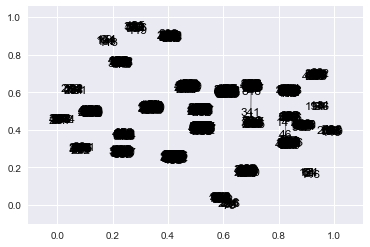

In [6]:
nx.draw_networkx_labels(G_Fortunato,pos)
nx.draw_networkx_edges(G_Fortunato,pos,width=1.0,alpha=0.5)

In [54]:
community_truth_values = [x[1] for x in communities]

In [55]:
W = pickle.load(open("emb/Fortunato_glove_1.emb", "rb" ))
G = nx.read_edgelist('Fortunato_Synthetic/1000_nodes_gamma_2_beta_1_network.dat')

In [56]:
len(W)

2000

In [57]:
x = len(W)/2
#emb = (W[0:x,:] + W[x:,:])/2.0
emb = W[0:x,:]
emb.shape

(1000L, 100L)

In [58]:
num_clusters = len(set(community_truth_values))
num_clusters

29

In [60]:
from collections import defaultdict
d = defaultdict(list)
kmeans = KMeans(n_clusters=num_clusters).fit(emb)
for i,j in enumerate(kmeans.labels_):
    d[j].append(str(i+1))

In [61]:
from sklearn.metrics import normalized_mutual_info_score as NMI

In [62]:
score = NMI(community_truth_values,kmeans.labels_)

In [63]:
score

0.99096544345169513

In [64]:
def fn_cluster(cluster_list):
    cluster_map = defaultdict(int)
    i = 1
    new_labels = []
    for label in cluster_list:
        if(label not in cluster_map):
            cluster_map[label] = i
            i += 1
        new_labels.append(cluster_map[label])
    return new_labels

In [65]:
c_truth = np.asarray(fn_cluster(community_truth_values))

In [66]:
c_detect = np.asarray(fn_cluster(kmeans.labels_))

In [67]:
diff = np.abs(c_truth-c_detect)
print np.sum(diff)*1.0/len(diff)

0.367


In [70]:
np.count_nonzero(diff)

197